In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [69]:
df_unlabeled=pd.read_csv('vehicle_claims.csv')
df_unlabeled.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,Seat_num,Door_num,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,5.0,4.0,Electrical Issue,4,12,2018-04-12,3,184.5000,6.0,2018-04-13
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,5.0,4.0,Brake Pads Worn,0,10,2018-06-10,3,134.3750,6.0,2018-06-11
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,5.0,4.0,Flat Tyres,0,2,2017-11-02,3,68.9997,3.0,2017-11-02
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,5.0,4.0,Gear Box Issue,0,27,2018-04-27,3,469.4800,6.0,2018-04-28
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,5.0,4.0,Electrical Issue,4,23,2017-11-23,3,199.6650,6.0,2017-11-24


In [70]:
df_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  object 
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

In [71]:
df_labeled=pd.read_csv('vehicle_claims_labeled.csv')
df_labeled.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,Label,category_anomaly,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,Starter Motor Issue,0,19,2018-04-19,3,395.000,9.0,0,0,2018-04-21
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,Radiator Leaking,0,15,2018-06-15,3,695.000,6.0,0,0,2018-06-16
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,Steering Wheel Shaking,0,10,2017-11-10,3,89.999,3.0,0,0,2017-11-10
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,Electrical Issue,4,14,2018-04-14,3,224.844,6.0,0,0,2018-04-15
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,Windscreen Crack,0,6,2017-11-06,3,75.933,3.0,0,0,2017-11-06


In [72]:
df_labeled[['Label','category_anomaly']].value_counts(normalize=True)

Label  category_anomaly
0      0                   0.788451
1      0                   0.118473
       1                   0.093076
dtype: float64

In [73]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  int64  
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

In [74]:
set(df_labeled.columns).difference(df_unlabeled.columns)

{'Label', 'category_anomaly'}

In [75]:
df_labeled.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'Label', 'category_anomaly', 'repair_date'],
      dtype='object')

In [76]:
# cat='Categórico'
# disc='Num Discreto'
# date='Data'
# cont='Num contínuo'
# car={'Marca do Carro':cat,'Nome do Carro':cat,'Versão do Carro':cat,'Cor':cat,'Ano do Carro':disc,
#  'Qtd de Assentos':disc,'Qtd de Portas':disc,'Tipo de Carro':cat,'Tipo de Motor':cat,
#  'Capacidade do Motor':disc,'Tipo de Combustível':cat,'Kilometragem':disc,'Preço':cont}
# ## 6 cat, 5 disc, 1 cont

# repair={'Complexidade do Reparo':cat,'Data do Reparo':date,'Tempo de Reparo':cont,
#         'Data do Sinistro':date,'Ano do Aviso':disc,'Mês do Aviso':disc,'Dia do Aviso':disc,'Tipo de Sinistro':cat}
# ## 3 disc, 2 cat, 2 date, 1 cont


In [77]:
# variables=pd.DataFrame(repair.values(),repair.keys()).reset_index().rename(columns={'index':'Variável',0:'Tipo'})
# variables

In [78]:
# pd.DataFrame(car.values(),car.keys()).reset_index().rename(columns={'index':'Variável',0:'Tipo'})

In [79]:
df_unlabeled.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'repair_date'],
      dtype='object')

In [80]:

# drop_columns=
columns_map={"Maker":"fabricante"," Genmodel":"modelo_carro"," Genmodel_ID":"ano_modelo_carro",
            "Door_num":"portas","Seat_num":"lugares","repair_complexity":"nivel_conserto",
            "repair_cost":"custo_conserto","repair_date":"data_conserto","repair_hours":"tempo_conserto",
            "breakdown_date":"data_sinistro","Fuel_type":"combustível","Color":"cor","Adv_year":"ano_aviso",
            "Adv_month":"mes_aviso","Bodytype":"tipo_carro","issue":"tipo_falha","issue_id":"categoria_falha",
            "Reg_year":"ano_registro","Engin_size":"tamanho_motor","Gearbox":"tipo_cambio","Adv_day":"dia_aviso",
            "Runned_Miles":"milhas_carro","Price":"preço"}

In [81]:
df_unlabeled=df_unlabeled.rename(columns=columns_map)
df_unlabeled.columns

Index(['fabricante', 'modelo_carro', 'ano_modelo_carro', 'ano_aviso',
       'mes_aviso', 'cor', 'ano_registro', 'tipo_carro', 'milhas_carro',
       'tamanho_motor', 'tipo_cambio', 'combustível', 'preço', 'lugares',
       'portas', 'tipo_falha', 'categoria_falha', 'dia_aviso', 'data_sinistro',
       'nivel_conserto', 'custo_conserto', 'tempo_conserto', 'data_conserto'],
      dtype='object')

In [82]:
df_unlabeled["mes_aviso"].unique()

array([ 4,  6, 11, 12,  8,  2,  3,  7,  5, 10,  9,  1, 13, 17, 33])

In [83]:
# df_unlabeled["data_aviso"]=pd.to_datetime(df_unlabeled["ano_aviso"].astype(str)\
#                                           +"-"+df_unlabeled["mes_aviso"].astype(str)\
#                                             +"-"+df_unlabeled["dia_aviso"].astype(str),errors='coerce')

In [84]:
class Dataset:

    def check_columns(self,all_columns,*columns_groups):
        columns=[]
        for group in columns_groups:
            if group:
                columns+=group
        if len(all_columns)==len(columns):

            raise ValueError(f"Columns do not match: {set(all_columns).difference(columns)}")        
        

    def __init__(self,df,cat_columns,date_columns,cont_columns,disc_column,label_column=None):
        self._df=df
        self.cat_columns=cat_columns
        self.date_columns=date_columns
        self.cont_columns=cont_columns
        self.disc_columns=disc_column
        if label_column is not None:
            self.labeled=True
            self.label_column=label_column
        else:
            self.labeled=False
            self.label_column=[]
       
        Dataset.check_columns(df.columns,cat_columns,date_columns,cont_columns,disc_column,label_column)
    
    @property
    def not_label_columns(self,date=False):
        if not date:
            return self.cat_columns+self.cont_columns+self.disc_columns
        else:
            return self.cat_columns+self.date_columns+self.cont_columns+self.disc_columns


    @property
    def df(self):
        return self._df
    
    @df.setter
    def df(self,df):
        self._df=df

    def set_sample(self,sample,type,name,subtype=None):
        if type  not in ["train","validation","test"]:
            raise ValueError("Type must be train, validation or test")
        if name not in ["X","Y"]:
            raise ValueError("Name must be X or Y")
        if subtype not in ["scaled",None]:
            raise ValueError("Subtype must be scaled or none")
        
        att_name=name+"_"+type if subtype is None else name+"_"+type+"_"+subtype

        setattr(self,att_name,sample)
        

class Loader:

    def __init__(self,path,cat_columns,date_columns,cont_columns,disc_columns,label_columns=None):
        df=pd.read_csv(path,dtype=str)
        self._dataset=Dataset(df,cat_columns,date_columns,cont_columns,disc_columns,label_columns)

    def rename_columns(self,columns_map):
        self._dataset.df=self._dataset.df.rename(columns=columns_map)
        
    @property
    def dataset(self):
        return self._dataset
        


class   Preprocessor:
    def __init__(self,dataset:Dataset):
        self.dataset=dataset
        self.df=dataset.df
        self.cat_columns=dataset.cat_columns
        self.date_columns=dataset.date_columns
        self.cont_columns=dataset.cont_columns
        self.disc_columns=dataset.disc_columns
        self.dataset.df
        
    def _convert_cat(self):
        self.df.loc[:,self.cat_columns]=self.df[self.cat_columns].astype('category')
    
    def _convert_date(self):
        for col in self.date_columns:
            self.df[col]=pd.to_datetime(self.df[col],errors='coerce')
    
    def _convert_cont(self):
        self.df[self.cont_columns]=self.df[self.cont_columns].astype(float)
  

    def _covert_discrete(self):
        self.df[self.disc_columns]=self.df[self.disc_columns].astype(float).astype(int)
       

    def fill_na(self,fill_value=""):
        self.df=self.df.fillna(fill_value)
    
    def na_analysis(self):
        return self.df.isna().sum()
    
    def drop_na(self):
        self.df=self.df.dropna()
    
    
    def replacements(self,columns,replacements):
        if isinstance(replacements,str):
            replacements=[replacements]*len(columns)
        if isinstance(columns,str):
            columns=[columns]
        if len(columns)!=len(replacements):
            raise ValueError("Columns and replacements must have the same length")

        for column,replacement in zip(columns,replacements):
            self.df[column]=self.df[column].str.replace(replacement,"")

    def create_dummies(self,columns):
        new_columns=[]
        for column in columns: new_columns+=list(map(lambda x:column+"_"+x, self.df[column].unique().tolist()))
        self.df=pd.get_dummies(self.df,columns=columns)
        for column in columns:
            if column in self.cat_columns:
                self.cat_columns.remove(column)
        self.cat_columns+=new_columns        
    
    def create_date(self,day_column,month_column,year_column,date_column=None):
        if date_column is None:
            date_column="data_"+day_column.split("_")[-1]
        self.df[date_column]=pd.to_datetime(self.df[day_column].astype(float).astype(int).astype(str)\
                                                +"-"+self.df[month_column].astype(float).astype(int).astype(str)\
                                                +"-"+self.df[year_column].astype(float).astype(int).astype(str)\
                                        ,errors='coerce')
        self.date_columns.append(date_column)
    

    def process_date(self):        
        for name,func in zip(["weekday","day","month","year"],[lambda x: x.dt.weekday,lambda x: x.dt.day,lambda x: x.dt.month,lambda x: x.dt.year]):
            columns=list(map(lambda x: x+"_"+name,self.date_columns))
            self.df[columns]=self.df[self.date_columns].apply(func)
            self.disc_columns+=columns
        


    def cat_to_codes(self,columns=None):
        if columns is None:
            columns=self.cat_columns
        print(columns)
        self.df[columns]=self.df[columns].apply(lambda x: x.astype('category').cat.codes)
        # for column in columns:
            # self.df.iloc[:,column]=self.df[column].astype("category").cat.codes
        
    def set_types(self):       
        # self._convert_cat()
        self._convert_date()
        self._convert_cont()     

    def update_dataset(self):
        self.dataset.df=self.df
        self.dataset.cat_columns=self.cat_columns
        self.dataset.date_columns=self.date_columns
        self.dataset.cont_columns=self.cont_columns
        self.dataset.disc_columns=self.disc_columns


In [85]:
      
      
columns_map={"Maker":"fabricante"," Genmodel":"modelo_carro"," Genmodel_ID":"ano_modelo_carro",
            "Door_num":"portas","Seat_num":"lugares","repair_complexity":"nivel_conserto",
            "repair_cost":"custo_conserto","repair_date":"data_conserto","repair_hours":"tempo_conserto",
            "breakdown_date":"data_sinistro","Fuel_type":"combustível","Color":"cor","Adv_year":"ano_aviso",
            "Adv_month":"mes_aviso","Bodytype":"tipo_carro","issue":"tipo_falha","issue_id":"categoria_falha",
            "Reg_year":"ano_registro","Engin_size":"tamanho_motor","Gearbox":"tipo_cambio","Adv_day":"dia_aviso",
            "Runned_Miles":"milhas_carro","Price":"preço"}

cat_columns=["fabricante", 'modelo_carro', 'ano_modelo_carro', 'cor', 'tipo_carro' 
              ,'tipo_cambio', 'combustível', 'tipo_falha', 'categoria_falha','nivel_conserto']

disc_columns=["ano_registro","lugares","portas","dia_aviso",'tamanho_motor','mes_aviso','ano_aviso']
date_columns=["data_conserto","data_sinistro",]
cont_columns=['preço','tempo_conserto',"milhas_carro","custo_conserto"]
label_columns=["Label","category_anomaly"]

if not (len(set(df_unlabeled.columns).difference(cat_columns+date_columns+cont_columns+disc_columns)))==0:
    print(set(df_unlabeled.columns).difference(cat_columns+date_columns+cont_columns+disc_columns))


loader=Loader('vehicle_claims_labeled.csv',cat_columns=cat_columns,date_columns=date_columns,cont_columns=cont_columns,disc_columns=disc_columns,label_columns=label_columns)
loader.rename_columns(columns_map)
preprocessor=Preprocessor(loader.dataset)
preprocessor.replacements(columns=["tamanho_motor","milhas_carro"],replacements=["L","mile"])
preprocessor.set_types()
preprocessor.create_date(day_column="dia_aviso",month_column="mes_aviso",year_column="ano_aviso")
preprocessor.create_dummies(["cor","tipo_cambio"])
preprocessor.cat_to_codes()
preprocessor.process_date()
# preprocessor.fill_na()
preprocessor.drop_na()
preprocessor.update_dataset()

/tmp/ipykernel_46229/2445895122.py:130: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.df[date_column]=pd.to_datetime(self.df[day_column].astype(float).astype(int).astype(str)\


['fabricante', 'modelo_carro', 'ano_modelo_carro', 'tipo_carro', 'combustível', 'tipo_falha', 'categoria_falha', 'nivel_conserto', 'cor_Silver', 'cor_Grey', 'cor_Blue', 'cor_Green', 'cor_Black', 'cor_Gelb', 'cor_White', 'cor_Red', 'cor_Brown', 'cor_Orange', 'cor_Maroon', 'cor_Purple', 'cor_Yellow', 'cor_Multicolour', 'cor_Gold', 'cor_Pink', 'cor_Bronze', 'cor_Beige', 'cor_Burgundy', 'cor_Magenta', 'cor_Turquoise', 'cor_Indigo', 'cor_Navy', 'tipo_cambio_Automatic', 'tipo_cambio_Semi-Automatic', 'tipo_cambio_Manual', 'tipo_cambio_Hybrid']


In [86]:
preprocessor.dataset.df.fillna("").isna().sum().sample(20)#
#
# .sum()

cor_Magenta              0
ano_modelo_carro         0
Label                    0
cor_Bronze               0
data_sinistro_month      0
tipo_carro               0
portas                   0
data_aviso_weekday       0
custo_conserto           0
data_conserto_day        0
cor_Multicolour          0
cor_Purple               0
cor_Grey                 0
data_sinistro_weekday    0
cor_Burgundy             0
combustível              0
cor_Yellow               0
cor_Pink                 0
milhas_carro             0
data_conserto_weekday    0
dtype: int64

In [87]:
class feature_engineering():
    pass

class Plotter():
    pass

from enum import Enum
class ScalerTypes(Enum):
    MINMAX="minmax"
    STANDARD="standard"
    ROBUST="robust"
    NORMALIZER="normalizer"

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,Normalizer
from sklearn.model_selection import train_test_split,StratifiedKFold



class MLPreprocessing():

    def _split(X,Y,**kwargs):

        X_train, X_test, Y_train, Y_test=train_test_split(X,Y,**kwargs)

        return X_train, X_test, Y_train, Y_test
   

    def __init__(self,dataset:Dataset) -> None:
        self.dataset=dataset
        self.dataset.__setattr__("scalable_columns",self.dataset.cont_columns+self.dataset.disc_columns)
        self.dataset.__setattr__("not_scalable_columns",self.dataset.cat_columns)


    def set_scaler(self,type="minmax"):
        scalers={"minmax":MinMaxScaler,"standard":StandardScaler,"robust":RobustScaler,"normalizer":RobustScaler}
        self.scaler=scalers[type]()

    def scale(self,sample=["train","validation","test"]):

        if not hasattr(self,"scaler"):
            raise ValueError("Scaler was not set")
        if not hasattr(self.dataset,"X_train"):
            raise ValueError("Train data was not set")        

        X_train_scaled=self.scaler.fit_transform(self.dataset.X_train[self.dataset.scalable_columns])
        X_train_scaled=pd.concat([self.dataset.X_train[self.dataset.not_scalable_columns],
                                  pd.DataFrame(X_train_scaled,columns=self.dataset.scalable_columns)],axis=1)
        self.dataset.set_sample(X_train_scaled,"train","X",subtype="scaled")

        if "test" in sample and hasattr(self.dataset,"X_test"):
            X_test_scaled=self.scaler.transform(self.dataset.X_test[self.dataset.scalable_columns])
            X_test_scaled=pd.concat([self.dataset.X_test[self.dataset.not_scalable_columns],
                                     pd.DataFrame(X_test_scaled,columns=self.dataset.scalable_columns)],axis=1)
            self.dataset.set_sample(X_test_scaled,"test","X",subtype="scaled")

        if "validation" in sample and hasattr(self.dataset,"X_validation"):
            X_val_scaled=self.scaler.transform(self.dataset.X_validation[self.dataset.scalable_columns])
            X_val_scaled=pd.concat([self.dataset.X_validation[self.dataset.not_scalable_columns],
                                    pd.DataFrame(X_val_scaled,columns=self.dataset.scalable_columns)],axis=1)
            self.dataset.set_sample(X_val_scaled,"validation","X",subtype="scaled")
    

    def split(self,validation=True,stratified=True,columns_stratify=None):

         
        train_size=0.7
        validation_size=0.15
        test_size=0.15 if validation else 0.3
        if not self.dataset.labeled:
            raise NotImplemented()
        
        if stratified and columns_stratify is not None:            
            columns_stratify+=self.dataset.label_column

              
        X_train, X_test, Y_train, Y_test=MLPreprocessing._split(self.dataset.df[self.dataset.not_label_columns],self.dataset.df[self.dataset.label_column],random_state=42,test_size=test_size+validation_size,stratify=columns_stratify)        
        if validation:
                X_test, X_val, Y_test, Y_val=MLPreprocessing._split(X_test,Y_test,random_state=42,test_size=validation_size/(test_size+validation_size),stratify=columns_stratify)
        else:
            X_val,Y_val=None,None
        
        self.dataset.set_sample(X_train,"train","X")
        self.dataset.set_sample(Y_train,"train","Y")
        self.dataset.set_sample(X_val,"validation","X")
        self.dataset.set_sample(Y_val,"validation","Y")
        self.dataset.set_sample(X_test,"test","X")
        self.dataset.set_sample(Y_test,"test","Y")




    def cross_validation():
        pass


In [90]:
MLpreprocessor=MLPreprocessing(preprocessor.dataset)
MLpreprocessor.split(validation=True)
MLpreprocessor.set_scaler()
MLpreprocessor.scale()

In [91]:
MLpreprocessor.dataset.scalable_columns

['preço',
 'tempo_conserto',
 'milhas_carro',
 'custo_conserto',
 'ano_registro',
 'lugares',
 'portas',
 'dia_aviso',
 'tamanho_motor',
 'mes_aviso',
 'ano_aviso',
 'data_conserto_weekday',
 'data_sinistro_weekday',
 'data_aviso_weekday',
 'data_conserto_day',
 'data_sinistro_day',
 'data_aviso_day',
 'data_conserto_month',
 'data_sinistro_month',
 'data_aviso_month',
 'data_conserto_year',
 'data_sinistro_year',
 'data_aviso_year']

In [97]:
from sklearn.base import BaseEstimator

class Model(BaseEstimator):
    def __init__(self,model,params,supervised:bool,run_scaled:bool=False) -> None:
        self._model=model
        self.params=params
        self.supervised=supervised
        self.set_params()
        self.run_scaled=run_scaled
    
    def set_params(self):
        self.created=True
        self._model=self._model(**self.params)
    
    def grid_search_params(self,params):
        self.grid_search_params=params

    @property
    def model(self):
        if not hasattr(self,"created"):
            raise ValueError("Model was not set")
        
        return self._model

    
    def __call__(self):
        return self.model



        

from sklearn.base import BaseEstimator
from typing import Any, List

class Trainer():
    def __init__(self,models:List[BaseEstimator],dataset:Dataset) -> None:
        if not isinstance(models,list):
            models=[models]
            
        self.models=models
        self.dataset=dataset
    
    def log_training_time(self):
        pass


    def train(self,**kwargs):
        for model in self.models:
            if model.supervised:
                if model.run_scaled:
                    model().fit(self.dataset.X_train_scaled,self.dataset.Y_train,**kwargs)
                else:
                    model().fit(self.dataset.X_train,self.dataset.Y_train,**kwargs)
            else:
                if model.run_scaled:
                    model().fit(self.dataset.X_train_scaled,**kwargs)
                else:
                    model().fit(self.dataset.X_train,**kwargs)    

            
    def predict(self):
        pass

class Evaluation():
    pass

In [93]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [94]:
MLpreprocessor.dataset.df.shape

(268253, 63)

In [98]:
SVM_outliers=Model(OneClassSVM,params={},supervised=True,run_scaled=True)

In [96]:
trainer=Trainer(SVM_outliers,MLpreprocessor.dataset)
trainer.train()

AttributeError: 'Model' object has no attribute 'run_scaled'

In [ ]:
trainer.models[0]

In [ ]:
MLpreprocessor.dataset.X_train_scaled.shape

(244014, 58)

In [ ]:
sorted(preprocessor.cat_columns)

['ano_modelo_carro',
 'categoria_falha',
 'combustível',
 'cor_Beige',
 'cor_Black',
 'cor_Blue',
 'cor_Bronze',
 'cor_Brown',
 'cor_Burgundy',
 'cor_Gelb',
 'cor_Gold',
 'cor_Green',
 'cor_Grey',
 'cor_Indigo',
 'cor_Magenta',
 'cor_Maroon',
 'cor_Multicolour',
 'cor_Navy',
 'cor_Orange',
 'cor_Pink',
 'cor_Purple',
 'cor_Red',
 'cor_Silver',
 'cor_Turquoise',
 'cor_White',
 'cor_Yellow',
 'fabricante',
 'modelo_carro',
 'nivel_conserto',
 'tipo_cambio_Automatic',
 'tipo_cambio_Hybrid',
 'tipo_cambio_Manual',
 'tipo_cambio_Semi-Automatic',
 'tipo_carro',
 'tipo_falha']

In [ ]:
cat_columns

['fabricante',
 'modelo_carro',
 'ano_modelo_carro',
 'cor',
 'ano_registro',
 'tipo_carro',
 'tipo_cambio',
 'combustível',
 'tipo_falha',
 'categoria_falha',
 'nivel_conserto']

In [ ]:
preprocessor.df.columns

Index(['fabricante', 'modelo_carro', 'ano_modelo_carro', 'ano_aviso',
       'mes_aviso', 'cor', 'ano_registro', 'tipo_carro', 'milhas_carro',
       'tamanho_motor', 'tipo_cambio', 'combustível', 'preço', 'lugares',
       'portas', 'tipo_falha', 'categoria_falha', 'dia_aviso', 'data_sinistro',
       'nivel_conserto', 'custo_conserto', 'tempo_conserto', 'data_conserto',
       'data_aviso', 'fabricante', 'modelo_carro', 'ano_modelo_carro',
       'ano_aviso', 'mes_aviso', 'ano_registro', 'tipo_carro', 'milhas_carro',
       'tamanho_motor', 'combustível', 'preço', 'lugares', 'portas',
       'tipo_falha', 'categoria_falha', 'dia_aviso', 'data_sinistro',
       'nivel_conserto', 'custo_conserto', 'tempo_conserto', 'data_conserto',
       'data_aviso', 'cor_Beige', 'cor_Black', 'cor_Blue', 'cor_Bronze',
       'cor_Brown', 'cor_Burgundy', 'cor_Gelb', 'cor_Gold', 'cor_Green',
       'cor_Grey', 'cor_Indigo', 'cor_Magenta', 'cor_Maroon',
       'cor_Multicolour', 'cor_Navy', 'cor_Orange'

In [ ]:
preprocessor.cat_columns#.__len__()

['fabricante',
 'modelo_carro',
 'ano_modelo_carro',
 'cor',
 'ano_registro',
 'tipo_carro',
 'tipo_cambio',
 'combustível',
 'lugares',
 'tipo_falha',
 'categoria_falha',
 'nivel_conserto']

In [ ]:
preprocessor.df[preprocessor.cat_columns]#.info()

,fabricante,fabricante,modelo_carro,modelo_carro,ano_modelo_carro,ano_modelo_carro,cor,ano_registro,ano_registro,tipo_carro,tipo_carro,tipo_cambio,combustível,combustível,tipo_falha,tipo_falha,categoria_falha,categoria_falha,nivel_conserto,nivel_conserto
0,Bentley,Bentley,Arnage,Arnage,10_1,10_1,Silver,2000.0,2000.0,Saloon,Saloon,Automatic,Petrol,Petrol,Electrical Issue,Electrical Issue,4,4,3,3
1,Bentley,Bentley,Arnage,Arnage,10_1,10_1,Grey,2002.0,2002.0,Saloon,Saloon,Automatic,Petrol,Petrol,Brake Pads Worn,Brake Pads Worn,0,0,3,3
2,Bentley,Bentley,Arnage,Arnage,10_1,10_1,Blue,2002.0,2002.0,Saloon,Saloon,Automatic,Petrol,Petrol,Flat Tyres,Flat Tyres,0,0,3,3
3,Bentley,Bentley,Arnage,Arnage,10_1,10_1,Green,2003.0,2003.0,Saloon,Saloon,Automatic,Petrol,Petrol,Gear Box Issue,Gear Box Issue,0,0,3,3
4,Bentley,Bentley,Arnage,Arnage,10_1,10_1,Grey,2003.0,2003.0,Saloon,Saloon,Automatic,Petrol,Petrol,Electrical Issue,Electrical Issue,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268250,Westfield,Westfield,Sport,Sport,97_1,97_1,Yellow,2006.0,2006.0,Convertible,Convertible,Manual,Petrol,Petrol,Excessive Emissions,Excessive Emissions,0,0,2,2
268251,Westfield,Westfield,Sport,Sport,97_1,97_1,Yellow,2006.0,2006.0,Convertible,Convertible,Manual,Hydrogen,Hydrogen,Sensor Malfunction,Sensor Malfunction,0,0,2,2
268252,Zenos,Zenos,E10,E10,99_1,99_1,Red,2016.0,2016.0,Convertible,Convertible,Manual,Petrol,Petrol,Starter Motor Issue,Starter Motor Issue,0,0,2,2
268253,Zenos,Zenos,E10,E10,99_1,99_1,Green,2016.0,2016.0,Convertible,Convertible,Manual,Petrol,Petrol,Alternator Failing,Alternator Failing,0,0,2,2


In [ ]:
day_column="dia_aviso"
month_column="mes_aviso"
year_column="ano_aviso"
df=preprocessor.df
df["novo"]=pd.to_datetime(
df[day_column].astype(float).astype(int).astype(str)\
                +"-"+df[month_column].astype(float).astype(int).astype(str)\
                +"-"+df[year_column].astype(float).astype(int).astype(str)
,errors='coerce')

In [ ]:
df.drop(columns=["novo"],inplace=True)

In [ ]:
pd.get_dummies(preprocessor.df["tipo_cambio"])

In [ ]:
import seaborn as sns

def cat_fig(df,columns):
    fig_cols=2
    fig_rows=int(np.ceil(len(columns)/fig_cols))
    fig, axs = plt.subplots(fig_rows,fig_cols,figsize=(10,2*fig_rows))
    axs=axs.flatten()
    for i,column in enumerate(columns):
        counts=df[column].value_counts().sort_values()
        if counts.shape[0]>10:
            counts=counts.nlargest(10)
        counts.plot(kind='barh',ax=axs[i],yticks=None)

        
        axs[i].set_title(column)

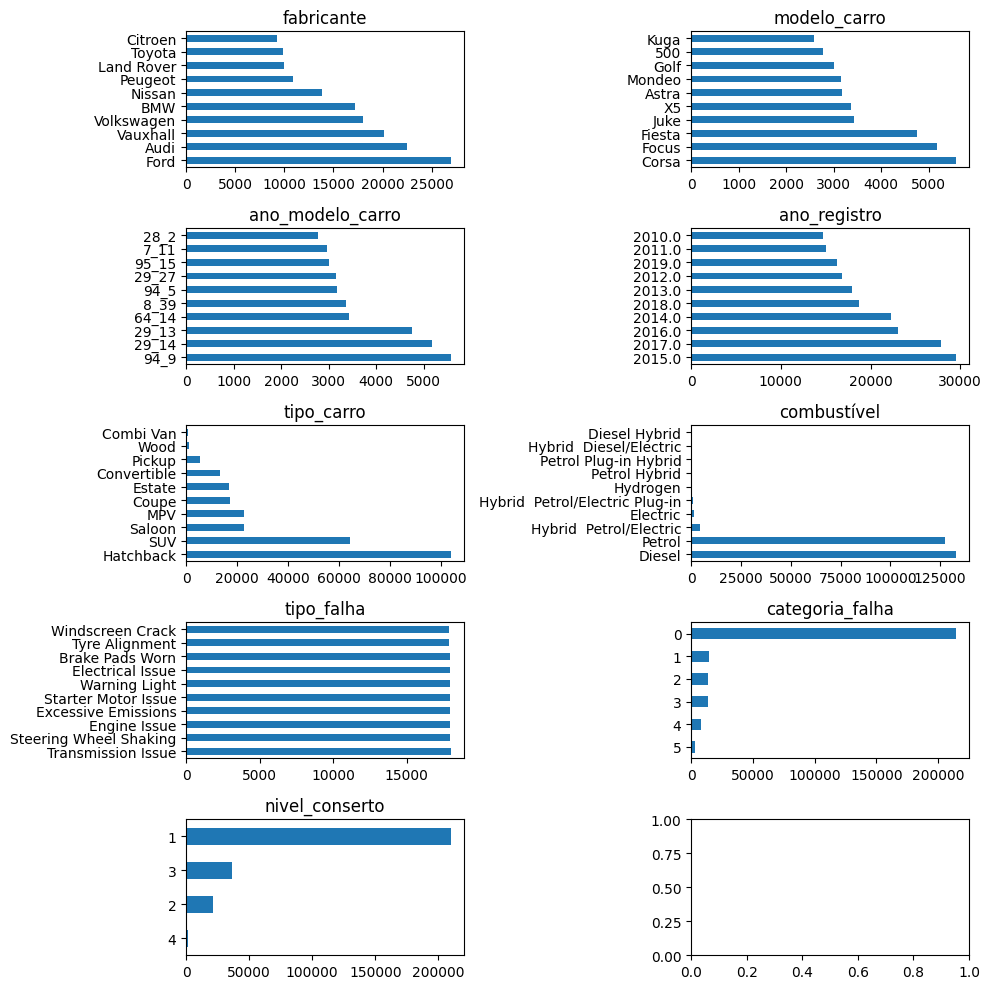

In [ ]:
cat_fig(df_unlabeled,cat_columns)
plt.tight_layout()

Feature Engineering

Feature Selection